<a href="https://colab.research.google.com/github/DL-WG/ROMS-tutorial/blob/main/MNIST_AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST with a fully-connected autoencoder: example
Thursday 4th March 2021

In [41]:
import tensorflow.keras as tf
from keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
!pip install eofs
import eofs
from eofs.standard import Eof
!pip3 install ann_visualizer
!pip install graphviz
import numpy as np

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=0a7a84f515b5bc9bd019f59806329ca3603f605b24781c22331e7ff19a119a17
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer


In [4]:
#Load data
(Xtrain, ytrain), (Xtest, ytest) = load_data()
# summarize the shape of the dataset
print('Train', Xtrain.shape, ytrain.shape)
print('Test', Xtest.shape, ytest.shape)

11493376/11490434 [==============================] - 0s 0us/step
Train (60000, 28, 28) (60000,)
Test (10000, 28, 28) (10000,)


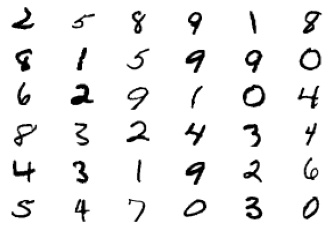

In [7]:
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.imshow(Xtrain[np.random.randint(Xtrain.shape[0])], cmap='gray_r')
  plt.axis('off')

In [14]:
#Gather model data
modelDataTotal = np.concatenate((Xtrain, Xtest))
modelData = np.reshape(modelDataTotal, (modelDataTotal.shape[0], modelDataTotal.shape[1]*modelDataTotal.shape[2]))
modelData.shape

(70000, 784)

In [28]:
#Scale data between 0 and 1
modelDataScaled = modelData/255.0
nSnapshots = modelData.shape[0]
nFeatures = modelData.shape[1]
print(np.max(modelDataScaled))
print('Number of snapshots: ' + str(nSnapshots))
print('Number of features: ' + str(nFeatures))

1.0
Number of snapshots: 70000
Number of features: 784


In [55]:
#Get training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(modelDataScaled, modelDataScaled, test_size=0.1, shuffle=True, random_state=42)

#X_train = np.expand_dims(X_train)
#X_test = np.expand_dims(X_test)

In [56]:
#Define model
input_enc = tf.Input(shape=(nFeatures))
enc = tf.layers.Dense(256)(input_enc)
enc = tf.layers.Dense(128)(enc)
enc = tf.layers.Dense(64)(enc)

enc_output = tf.layers.Reshape((1, 64))(enc)

input_dec = tf.Input(shape=(1, 64))
dec = tf.layers.Dense(128)(input_dec)
dec = tf.layers.Dense(256)(dec)
dec = tf.layers.Dense(nFeatures, activation='sigmoid')(dec)

#Encoder model
enc_model = tf.Model(input_enc, enc_output)
enc_model.summary()
#Decoder model
dec_model = tf.Model(input_dec, dec)
dec_model.summary()
#ae model
ae_model = tf.Model(input_enc, dec_model(enc_output))

ae_model.compile(loss='mse', optimizer='adam')

Model: "model_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_66 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_67 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_68 (Dense)             (None, 64)                8256      
_________________________________________________________________
reshape_11 (Reshape)         (None, 1, 64)             0         
Total params: 242,112
Trainable params: 242,112
Non-trainable params: 0
_________________________________________________________________
Model: "model_27"
_________________________________________________________________
Layer (type)                 Outpu

In [ ]:
history = ae_model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=2, validation_data = (X_test, y_test), shuffle = True)


Epoch 1/500
1969/1969 - 16s - loss: 0.0682 - val_loss: 0.0673
Epoch 2/500
1969/1969 - 14s - loss: 0.0674 - val_loss: 0.0673
Epoch 3/500
1969/1969 - 15s - loss: 0.0674 - val_loss: 0.0673
Epoch 4/500
1969/1969 - 15s - loss: 0.0674 - val_loss: 0.0673
Epoch 5/500
1969/1969 - 15s - loss: 0.0674 - val_loss: 0.0672
Epoch 6/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0673
Epoch 7/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
Epoch 8/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
Epoch 9/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0673
Epoch 10/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
Epoch 11/500
1969/1969 - 14s - loss: 0.0673 - val_loss: 0.0672
Epoch 12/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
Epoch 13/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
Epoch 14/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
Epoch 15/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
Epoch 16/500
1969/1969 - 15s - loss: 0.0673 - val_loss: 0.0672
E

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Loss', 'Val_loss'])